# Toy Data Showing How Smoother works

Import necessary modules: 

In [206]:
from scipy.spatial.distance import cdist
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Models import VKR,KRR
import warnings
from sklearn.metrics import precision_recall_curve, auc, roc_curve

## Define the Smoother

In [2]:
def normalization(K):
    """
    Degree normalization.

    Parameters
    ----------
    K: array
        Matrix requires degree normalization.
    
    Returns
    ----------
    K_normalized: array
        Normalized matrix.
    
    """
    d1 = K.sum(axis=0) + 10e-8
    d2 = K.sum(axis=1) + 10e-8
    K_normalized = (K.T / np.sqrt(d2)).T / np.sqrt(d1)
    return K_normalized

def smoother(Y, K_Y, c, n):
    """
    This function is smoothing Y twice to Y_SS by the smoother. Also the smoothed Y is normalized to the scale of 0 to 1.

    Parameters
    ----------
    Y: array
        Matrix needs to be smoothed.

    Returns
    ----------
    min_max_normalized_matrix: array
        Smoothed and normalized matrix.
        
    """
    Y_SS =  ((1-c)*np.diag(np.ones(n))+c*normalization(K_Y)).dot((1-c)*(np.diag(np.ones(n))+c*normalization(K_Y))).dot(Y)
    min_val = np.min(Y_SS)
    max_val = np.max(Y_SS)
    min_max_normalized_matrix = (Y_SS - min_val) / (max_val - min_val)
    return min_max_normalized_matrix
def smoother2(Y, K_Y, c, n):
    """
    To show the necessity of smoothing Y twice, we also defined a function that smooths Y only once.

    Parameters
    ----------
    Y: array
        Matrix needs to be smoothed.

    Returns
    ----------
    min_max_normalized_matrix: array
        Smoothed and normalized matrix.
        
    """
    Y_S =  ((1-c)*np.diag(np.ones(n))+c*normalization(K_Y)).dot(Y)
    min_val = np.min(Y_S)
    max_val = np.max(Y_S)
    min_max_normalized_matrix = (Y_S - min_val) / (max_val - min_val)
    return min_max_normalized_matrix

## Visualize $Y$, $Y_S$ and $Y_SS$

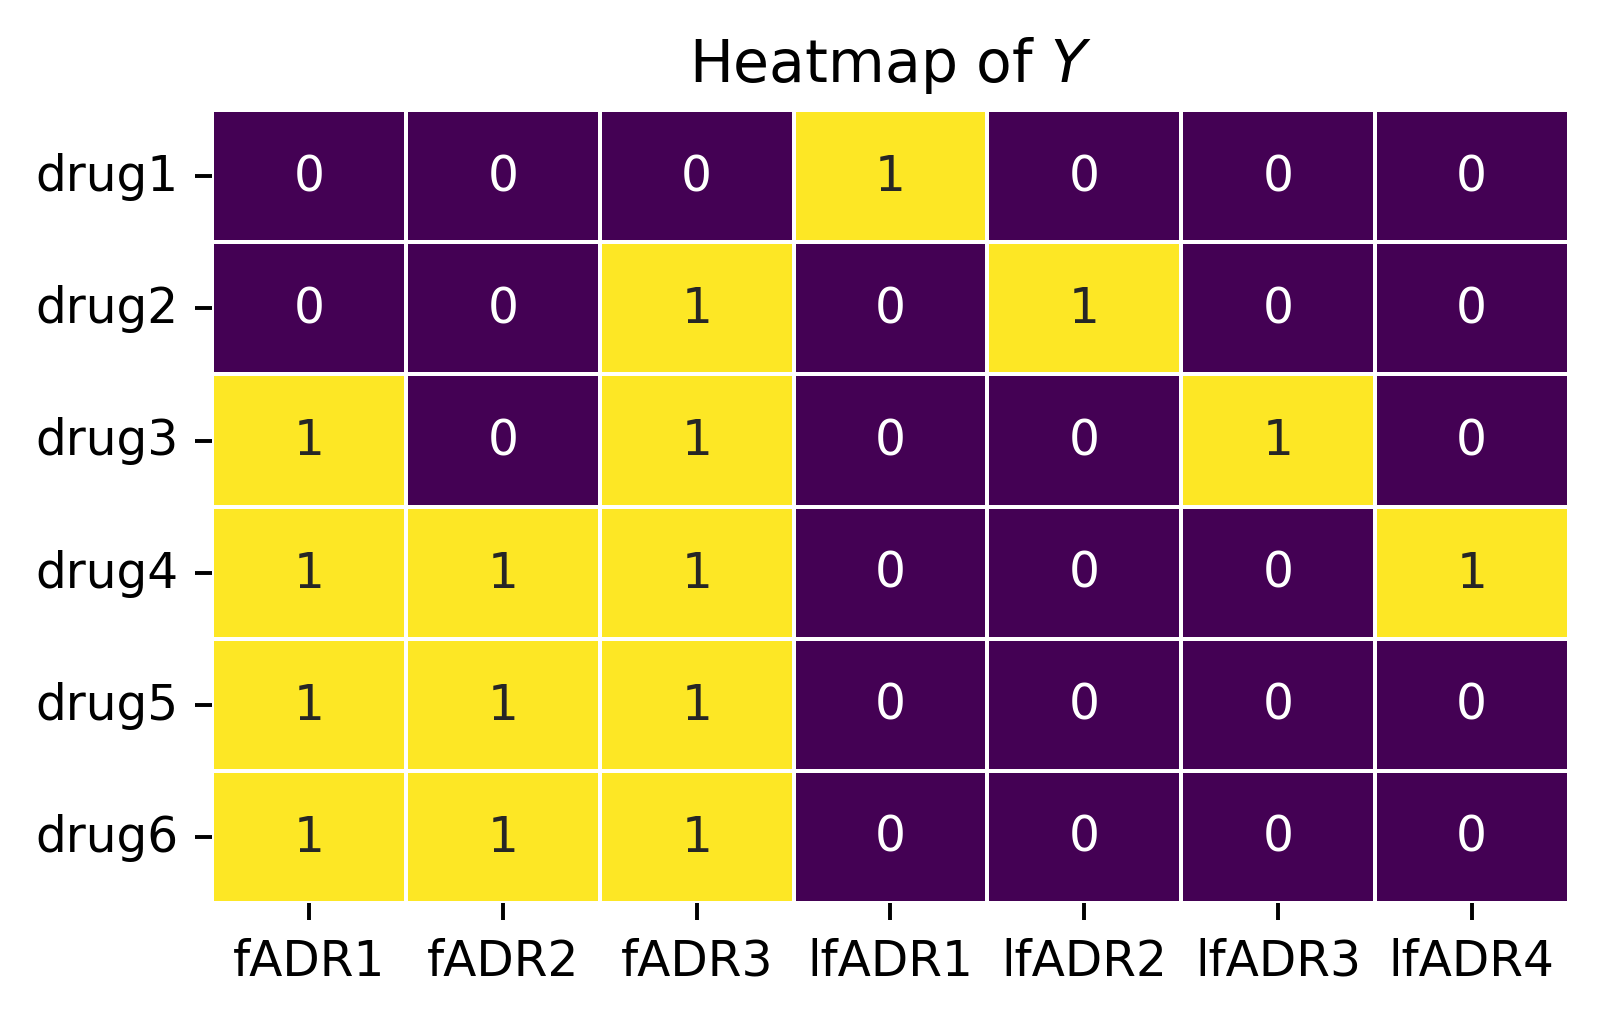

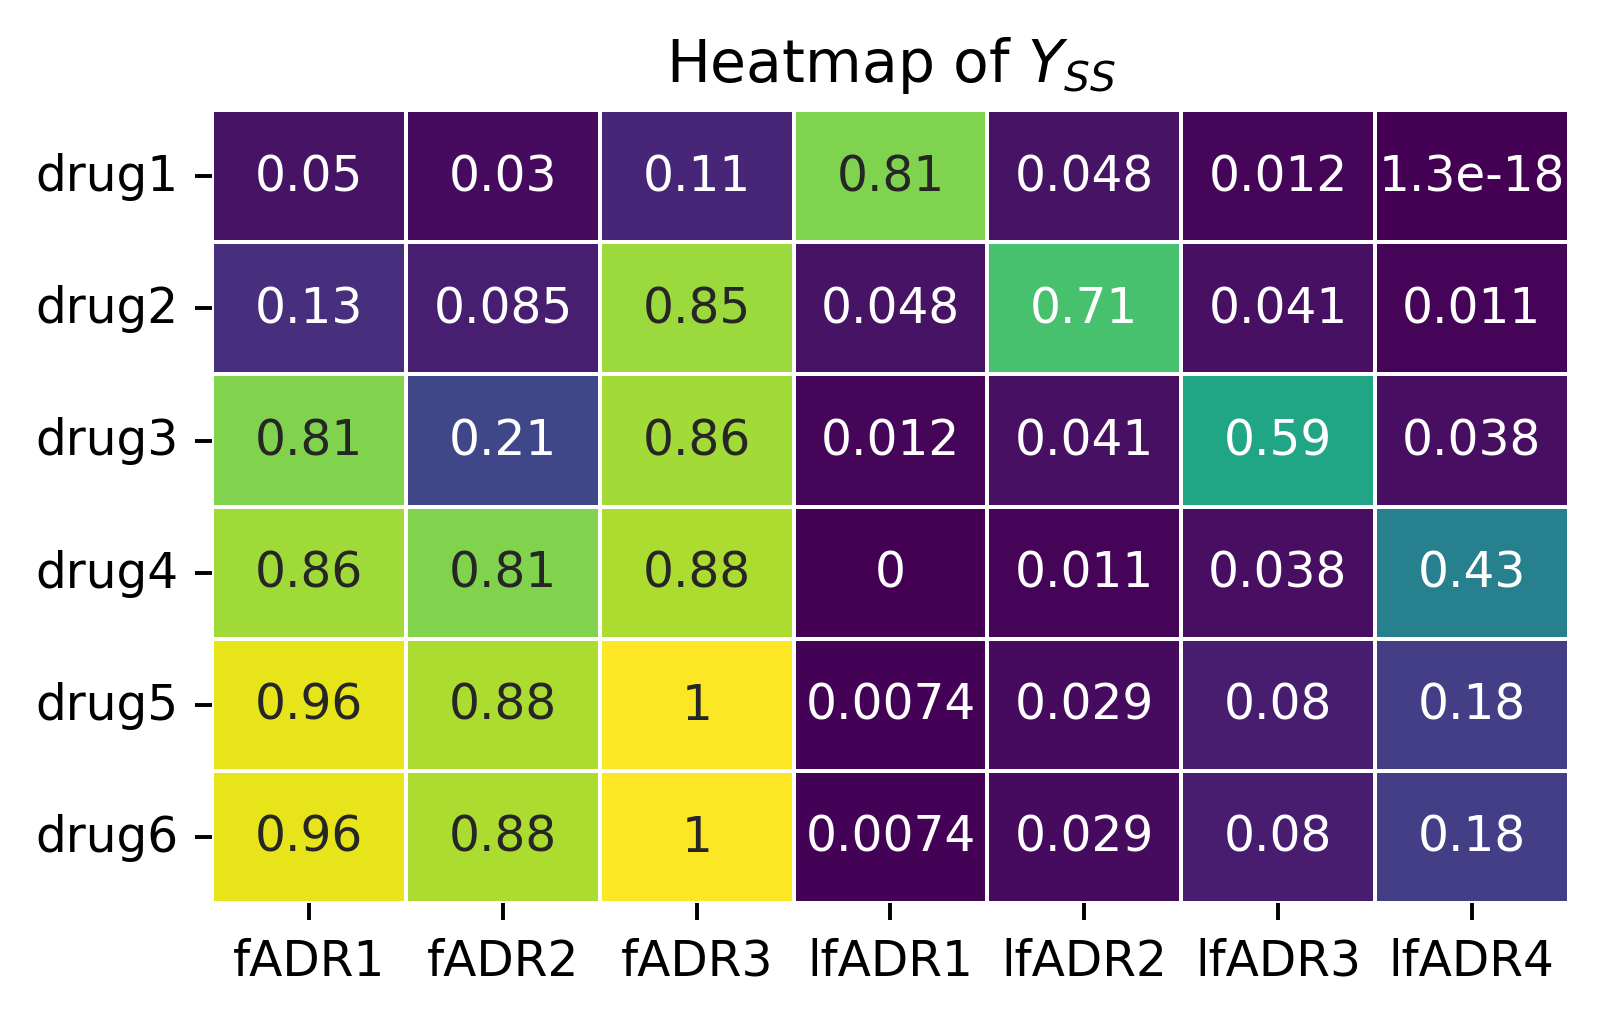

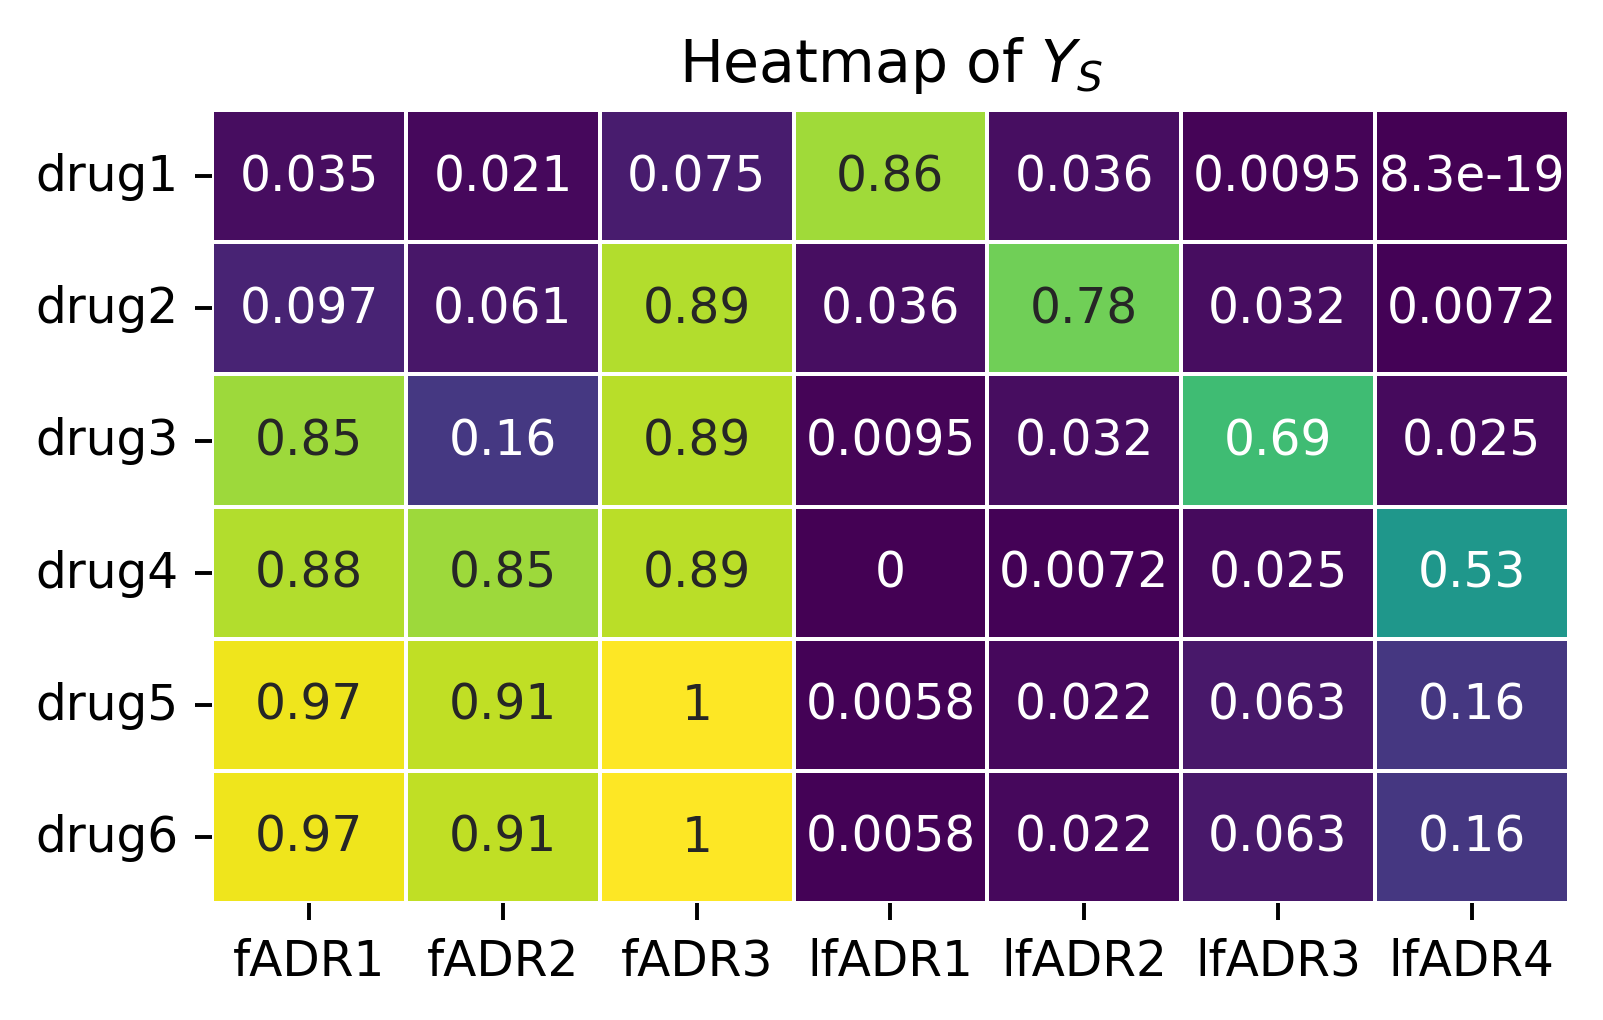

In [3]:
# Toy data Y
Y = np.array(
    [[0, 0, 0, 1, 0, 0, 0],
     [0, 0, 1, 0, 1, 0, 0],
     [1, 0, 1, 0, 0, 1, 0],
     [1, 1, 1, 0, 0, 0, 1],
     [1, 1, 1, 0, 0, 0, 0],
     [1, 1, 1, 0, 0, 0, 0]]).astype(float)
k = np.exp(-cdist(Y, Y)**2/1**2)
Y_SS=smoother(Y, k, 0.99, Y.shape[0])

# Plot heatmap
x_labels = ["fADR1", "fADR2", "fADR3", "lfADR1", "lfADR2", "lfADR3", "lfADR4"]
y_labels = [f'drug{i}' for i in range(1, Y.shape[0]+1)]

plt.figure(figsize=(5, 3), dpi=350)
sns.heatmap(Y, annot=True, cbar=False, cmap='viridis', linewidths=.5, xticklabels=x_labels, yticklabels=y_labels)
plt.title('Heatmap of $Y$')
plt.savefig(fname="figs/heatmapY.jpg", bbox_inches="tight")
plt.show()

plt.figure(figsize=(5, 3), dpi=350)
sns.heatmap(Y_SS, annot=True, cbar=False, cmap='viridis', linewidths=.5, xticklabels=x_labels, yticklabels=y_labels)
plt.title('Heatmap of $Y_{SS}$')
plt.savefig(fname="figs/heatmapYSS.jpg", bbox_inches="tight")
plt.show()

Y_S=smoother2(Y, k, 0.99, Y.shape[0])
plt.figure(figsize=(5, 3), dpi=350)
sns.heatmap(Y_S, annot=True, cbar=False, cmap='viridis', linewidths=.5, xticklabels=x_labels, yticklabels=y_labels)
plt.title('Heatmap of $Y_S$')
plt.savefig(fname="figs/heatmapYS.jpg", bbox_inches="tight")
plt.show()

## Visualize the example prediction of VKR

We set a extreme prediction of VKR to show the limitation of VKR:

/home/yezhao/anaconda3/envs/tf-2/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


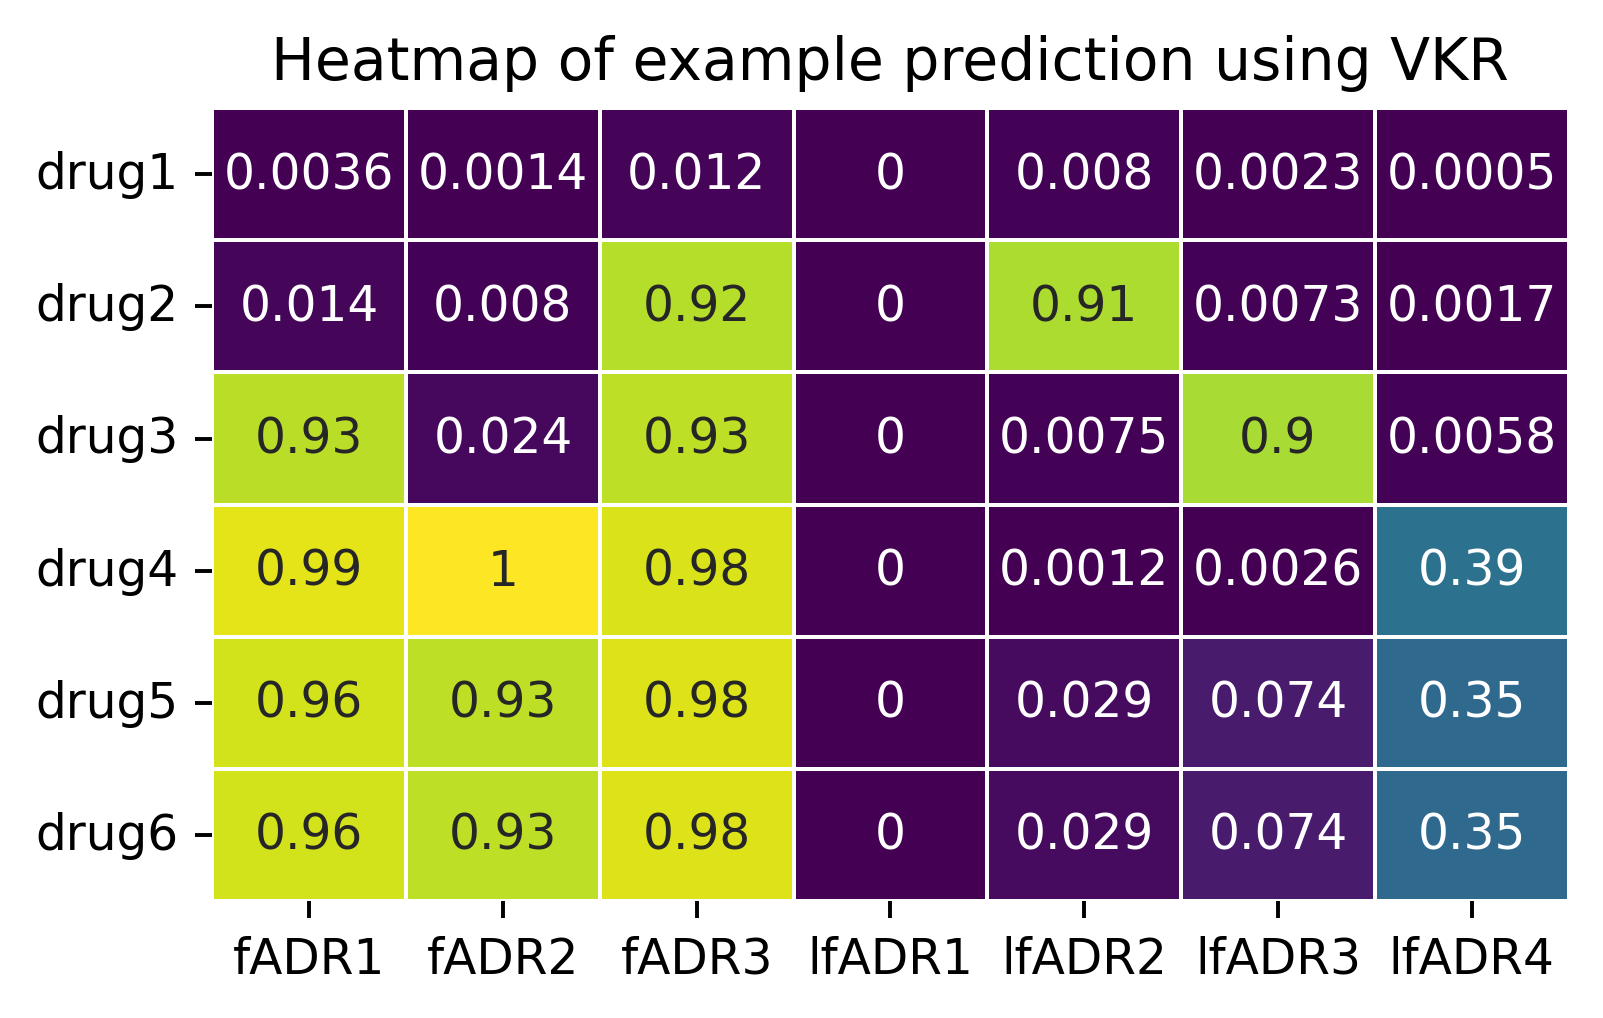

In [281]:
sigma = 1
lmd = 0.1
k = 3
model = VKR(sigma=sigma, lmd=lmd, k=k)
model.fit(X=Y,Y=Y)
Y_VKR = model.predict(X_new=Y)
# min_val = np.min(Y_SS)
# max_val = np.max(Y_SS)
# min_max_normalized_matrix = (Y_SS - min_val) / (max_val - min_val)
Y_VKR = np.array(
    Y_VKR).astype(float)
# k = np.exp(-cdist(Y, Y)**2/1**2)
# Y_SS=smoother(Y, k, 0.99, Y.shape[0])

# Plot heatmap
x_labels = ["fADR1", "fADR2", "fADR3", "lfADR1", "lfADR2", "lfADR3", "lfADR4"]
y_labels = [f'drug{i}' for i in range(1, Y.shape[0]+1)]

plt.figure(figsize=(5, 3), dpi=350)
sns.heatmap(Y_VKR, annot=True, cbar=False, cmap='viridis', linewidths=.5, xticklabels=x_labels, yticklabels=y_labels)
plt.title('Heatmap of example prediction using VKR')
plt.savefig(fname="figs/heatmapVKR.jpg", bbox_inches="tight")
plt.show()

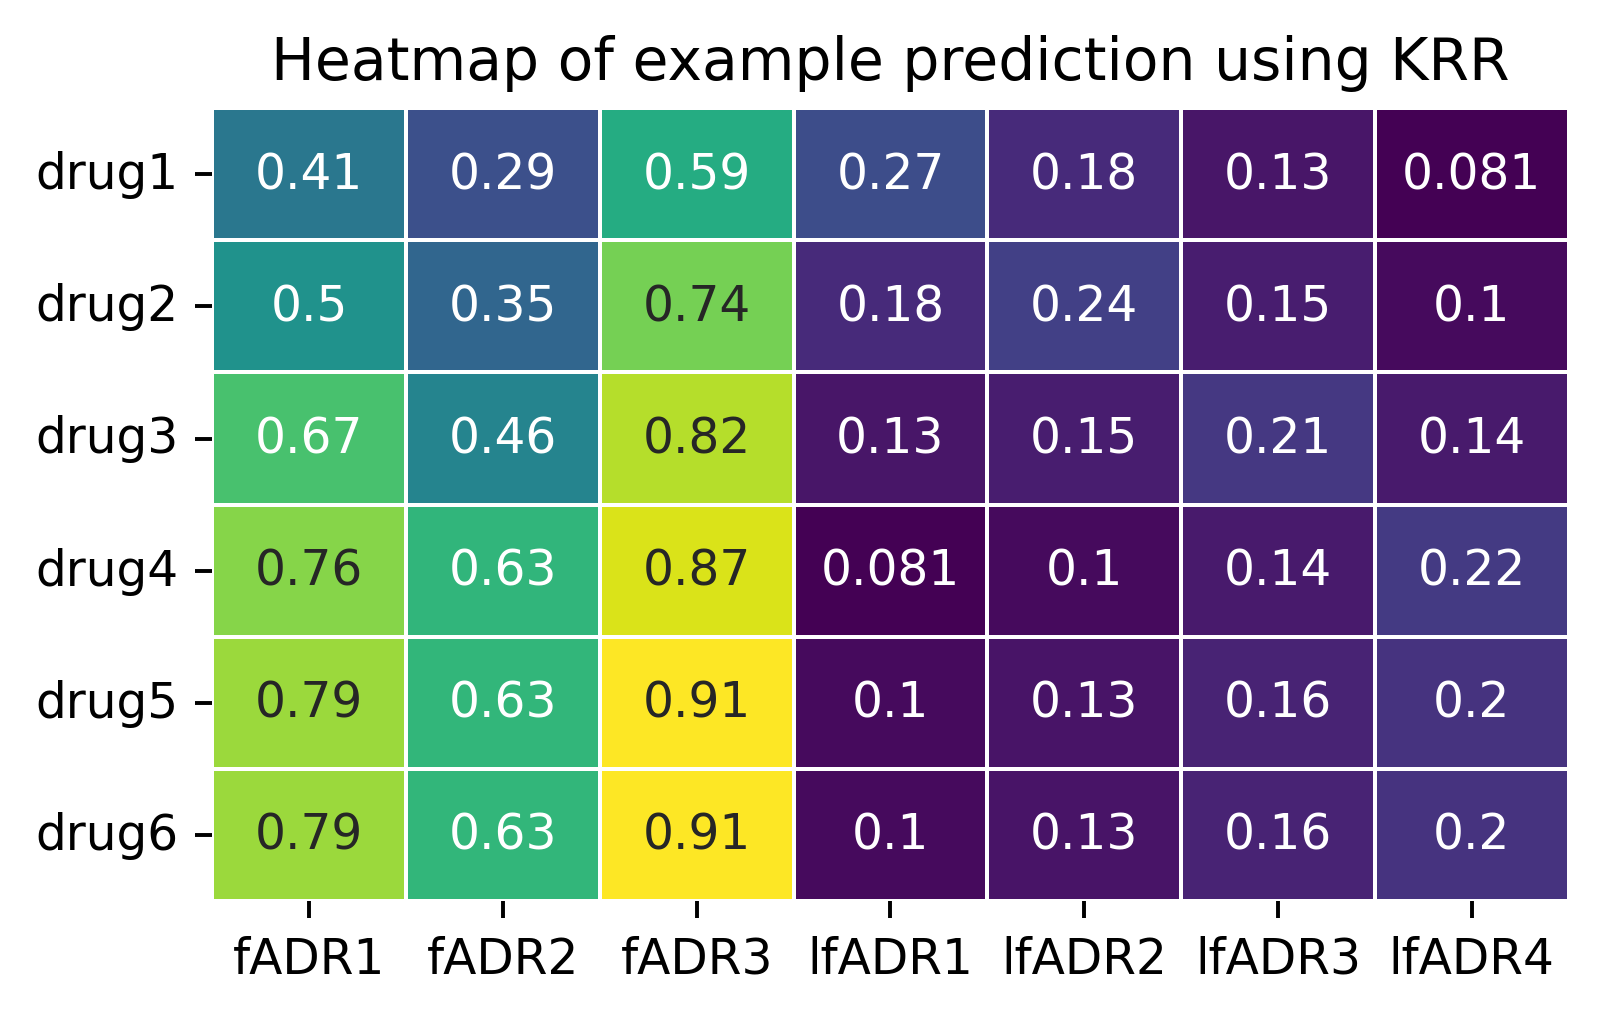

In [275]:
sigma = 3.
lmd = 1
model = KRR(sigma_X=sigma, lmd=lmd)
model.fit(X=Y,Y=Y)
Y_KRR = model.predict(X_new=Y)
# min_val = np.min(Y_KRR)
# max_val = np.max(Y_KRR)
# min_max_normalized_matrix = (Y_KRR - min_val) / (max_val - min_val)
Y_KRR = np.array(
    Y_KRR).astype(float)
# k = np.exp(-cdist(Y, Y)**2/1**2)
# Y_SS=smoother(Y, k, 0.99, Y.shape[0])

# Plot heatmap
x_labels = ["fADR1", "fADR2", "fADR3", "lfADR1", "lfADR2", "lfADR3", "lfADR4"]
y_labels = [f'drug{i}' for i in range(1, Y.shape[0]+1)]

plt.figure(figsize=(5, 3), dpi=350)
sns.heatmap(Y_KRR, annot=True, cbar=False, cmap='viridis', linewidths=.5, xticklabels=x_labels, yticklabels=y_labels)
plt.title('Heatmap of example prediction using KRR')
plt.savefig(fname="figs/heatmapKRR.jpg", bbox_inches="tight")
plt.show()

In [276]:
def evaluation(Y, Y_pred):
    fpr, tpr, threshold = roc_curve(Y.ravel(), Y_pred.ravel())
    AUROC = auc(fpr, tpr) 
    prec, recall, threshold = precision_recall_curve(Y.ravel(), Y_pred.ravel())
    AUPR = auc(recall, prec)
    print(f"sum: {AUROC+AUPR:.4f}, AUROC:{AUROC:.4f}, AUPR:{AUPR:.4f}")


    AUROC_perdrug = []
    AUPR_perdrug = []
    for i in range(len(Y)):
        if Y[i, :].sum() == 0:
            AUROC_perdrug.append(np.nan)
        elif Y_pred[i, :].sum() == 0:
            AUROC_perdrug.append(0)
        else:
            fpr, tpr, threshold = roc_curve(Y[i, :].ravel(), Y_pred[i, :].ravel())
            AUROC_perdrug.append(auc(fpr, tpr))

        if Y[i, :].sum() == 0:
            AUPR_perdrug.append(np.nan)
        elif Y_pred[i, :].sum() == 0:
            AUPR_perdrug.append(np.nan)
        else:
            prec, recall, threshold = precision_recall_curve(Y[i, :].ravel(), Y_pred[i, :].ravel())
            AUPR_perdrug.append(auc(recall, prec))

    print(f"sum: {np.nanmean(np.array(AUROC_perdrug))+np.nanmean(np.array(AUPR_perdrug)):.4f},AUROC perdrug:{np.nanmean(np.array(AUROC_perdrug)):.4f},AUPR perdrug,{np.nanmean(np.array(AUPR_perdrug)):.4f}")

In [277]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

Evaluation of VKR on toy data

In [278]:
print("all")
evaluation(Y, Y_VKR)
print("fADR")
evaluation(Y[:,0:3], Y_VKR[:,0:3])
print("lfADR")
evaluation(Y[:,3:7], Y_VKR[:,3:7])

all
sum: 1.9059, AUROC:0.9435, AUPR:0.9624
sum: 1.6786,AUROC perdrug:0.8333,AUPR perdrug,0.8452
fADR
sum: 2.0000, AUROC:1.0000, AUPR:1.0000
sum: 2.0000,AUROC perdrug:1.0000,AUPR perdrug,1.0000
lfADR
sum: 1.5729, AUROC:0.7812, AUPR:0.7917
sum: 1.5312,AUROC perdrug:0.7500,AUPR perdrug,0.7812


Evaluation of KR on toy data

In [279]:
print("all")
evaluation(Y, Y_KRR)
print("fADR")
evaluation(Y[:,0:3], Y_KRR[:,0:3])
print("lfADR")
evaluation(Y[:,3:7], Y_KRR[:,3:7])

all
sum: 1.8670, AUROC:0.9423, AUPR:0.9247
sum: 1.6588,AUROC perdrug:0.8694,AUPR perdrug,0.7894
fADR
sum: 2.0000, AUROC:1.0000, AUPR:1.0000
sum: 2.0000,AUROC perdrug:1.0000,AUPR perdrug,1.0000
lfADR
sum: 2.0000, AUROC:1.0000, AUPR:1.0000
sum: 2.0000,AUROC perdrug:1.0000,AUPR perdrug,1.0000
